In [1]:
import matplotlib as mlp
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
import os
import seaborn as sns

In [3]:
sns.set()


In [8]:
#sigsa = pd.read_excel("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.xlsx", 
#           skiprows=4, encoding="latin-1")
# sigsa.to_csv("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.csv", index=False)
sigsa = pd.read_csv("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.csv", 
                   # index_col=0
                   )

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#sigsa.columns
pd.options.display.max_columns=1000
pd.options.display.width = 200

In [10]:
def countCods(x):
    return len(x.unique())

In [11]:
sigsa.columns = ["Año", "Mes", "Área de Salud", "Distrito de Salud", "Servicio de Salud", "Tipo Servicio", "Municipio",
"Fecha", "Codigo de Persona", "Lugar de Nacimiento-Depto", "Lugar de Nacimiento-Muni", 
"Fecha de Nacimiento-Day", "Fecha de Nacimiento-Month", "Fecha de Nacimiento-Year", 
"Nacionalidad", "Sexo", "Residencia Actual-Depto", "Residencia Actual-Muni", "Orientación Sexual",
"Pueblo", "Comunidad Liguistica", "Condición de Riesgo", "Motivo de Orientación", "Embarazo y Puerperio",
"Orientación Pre Prueba", "Se hizo la Prueba", "VIH-Prueba de Tamizaje", "VIH-Resultado-t", "VIH-Prueba Confirmatoria",
"VIH-Resultado-c", "Sif-Prueba Treponémica", "Sif-Resultado", "Sif-Prueba no Treponémica", "Sif-Resultado de la Dilución",
"HepB-Prueba de Tamizaje", "HepB-Resultado", "Entrega de Resultados con Orientacion Post Prueba", "Referencia"]

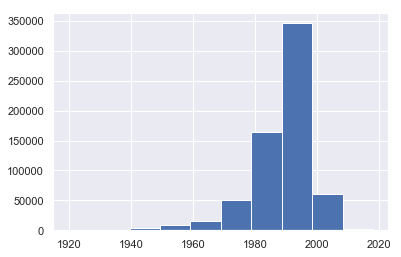

In [12]:
sigsa["Fecha de Nacimiento-Year"].hist()

In [13]:
sigsa["Condición de Riesgo"].value_counts()

Mujer en Riesgo                         460591
Hombre en Riesgo                         72952
Joven en Riesgo Social                   62127
-                                        25398
Trabajador Sexual                        19850
Privado de Libertad                       4624
Niño/a en contexto de vulnerabilidad      4108
Uniformado                                2892
Migrante                                  1080
Name: Condición de Riesgo, dtype: int64

In [14]:
sigsa["Orientación Sexual"].value_counts()

Heterosexual    613244
-                29492
Homosexual        5644
Bisexual          3052
Trans             2190
Name: Orientación Sexual, dtype: int64

In [15]:
def tryfun(f, defaultval=None):
    def w(i):
        try:
            return f(i)
        except:
            return defaultval
    return w

In [16]:
sigsa["Año"] = sigsa.Año.map(tryfun(int, None))

In [17]:
sigsa.Año.value_counts()

2017.0    252312
2016.0    221393
2015.0    179486
2014.0       431
Name: Año, dtype: int64

In [ ]:
sigsa["Residencia Actual-Depto"].unique()

In [62]:
sigsaDeptos = {
    'ESCUINTLA': 5, 
    'SANTA ROSA': 6, 
    'GUATEMALA': 1,
    'QUETZALTENANGO': 9,
    'TOTONICAPAN': 8, 
    'SAN MARCOS': 12, 
    'SUCHITEPEQUEZ': 10, 
    'HUEHUETENANGO': 13,
    'SOLOLA': 7, 
    'QUICHE': 14, 
    'RETALHULEU': 11, 
    'ZACAPA': 19, 
    'EL PROGRESO': 2,
    'ALTA VERAPAZ': 16, 
    'SACATEPEQUEZ': 3, 
    'CHIQUIMULA': 20, 
    '(OTROS)': 0, 
    'IZABAL': 18,
    'CHIMALTENANGO': 4, 
    'JUTIAPA': 22, 
    'BAJA VERAPAZ': 15, 
    'EL PETEN': 17, 
    'JALAPA': 21
}

In [18]:
dfs1 = []
dfs2 = []
dirdata = "../../../../Outcome Measurement Data/HIV/GTrends/"
for f in os.listdir(dirdata):
    if "TS" not in f and "sintomas" in f:
        dfs1.append(pd.read_csv(dirdata + f, header = None, 
                               names = ["depto", "fever", "headache", "fatigue", "symptHIV", "symptSIDA"], 
                               skiprows=3).assign(filename=f))
    elif "TS" not in f and "coinfeccion" in f:
        dfs2.append(pd.read_csv(dirdata + f, header = None, 
                               names = ["depto", "gonorrea", "sifilis", "infiel", "herpes", "infdld"], 
                               skiprows=3).assign(filename=f))

In [35]:
gtrends = None
for df in [dfs1, dfs2]:
    temp = pd.concat(df)
    temp["Año"] = temp.filename.map(lambda x: int(x.split("-")[2]))
    temp["Mes"] = temp.filename.map(lambda x: int(x.split("-")[3][0:2]))
    temp["Term"] = temp.filename.map(lambda x: x.split("-")[0])
    temp.drop(columns=["filename", "Term"], inplace=True)
    if gtrends is None:
        gtrends=temp
    else: 
        gtrends = gtrends.merge(temp, on=["Año", "Mes", "depto"], how="outer")

In [41]:
gtrends.applymap(lambda x: x.replace("%", "") if type(x) == str else x)

,depto,fever,headache,fatigue,symptHIV,symptSIDA,Año,Mes,gonorrea,sifilis,infiel,herpes,infdld
0,El Progreso Department,100,NaN,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
1,Retalhuleu Department,100,NaN,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
2,Sololá Department,100,NaN,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
3,Alta Verapaz,50,NaN,50,NaN,NaN,2016,1,NaN,NaN,100,NaN,NaN
4,Jutiapa Department,NaN,100,NaN,NaN,NaN,2016,1,50,NaN,50,NaN,NaN
5,Petén Department,50,NaN,50,NaN,NaN,2016,1,100,NaN,NaN,NaN,NaN
6,Izabal Department,NaN,100,NaN,NaN,NaN,2016,1,100,NaN,NaN,NaN,NaN
7,Quetzaltenango Department,54,31,15,NaN,NaN,2016,1,NaN,25,NaN,75,NaN
8,San Marcos Department,50,50,NaN,NaN,NaN,2016,1,NaN,NaN,100,NaN,NaN
9,Guatemala Department,42,37,9,5,7,2016,1,6,8,34,42,10


In [42]:
gtDeptos = {
    'Santa Rosa Department': 6, 
    'Suchitepequez': 10,
    'Petén Department': 17,
    'Zacapa Department': 19, 
    'Escuintla': 5, 
    'Jalapa Department': 21,
    'Huehuetenango Department': 13, 
    'Quetzaltenango Department': 9,
    'Guatemala Department': 1, 
    'Sacatepequez': 3, 
    'Alta Verapaz': 16,
    'Baja Verapaz Department': 15, 
    'Chimaltenango Department': 4,
    'Chiquimula Department': 20, 
    'Izabal Department': 18, 
    'Jutiapa Department': 22,
    'El Progreso Department': 2, 
    'Quiché Department': 14,
    'Retalhuleu Department': 11, 
    'San Marcos Department': 12,
    'Sololá Department': 7, 
    'Totonicapán Department': 8
}

In [43]:
gtrends["deptocode"] = gtrends.depto.map(lambda x: gtDeptos.get(x))

In [29]:
#gtrends.groupby(["Año", "deptocode"]).apply(len).unstack([0])

In [45]:
gtrendsts = [
    [],
    []
]
gtmensual = None
for f in os.listdir(dirdata):
    if "TS" in f and "sintomas" in f:
        gtrendsts[0].append(pd.read_csv(dirdata + f, header = None, 
                                     names = ["week", "fever", "headache", "fatigue", "symptHIV", "symptSIDA"], 
                                     skiprows=3).assign(filename=f))
    if "TS" in f and "coinfeccion" in f:
        gtrendsts[1].append(pd.read_csv(dirdata + f, header = None, 
                                     names = ["week", "gonorrea", "sifilis", "infiel", "herpes", "infdld"], 
                                     skiprows=3).assign(filename=f))

for ts in gtrendsts:
    temp = pd.concat(ts).assign(
        month = lambda x: x.week.map(lambda y: y.split("-")[1]).astype(int),
        year = lambda x: x.week.map(lambda y: y.split("-")[0]).astype(int)
    ).groupby(["year", "month"]).mean().reset_index()
    
    if gtmensual is None:
        gtmensual = temp
    else:
        gtmensual = gtmensual.merge(temp, on=["year", "month"])

In [47]:
cols = [
    "fever", "headache", "fatigue", "symptHIV", "symptSIDA",
    "gonorrea", "sifilis", "infiel", "herpes", "infdld"
]

In [50]:
gtproc = gtrends.merge(gtmensual, left_on=["Año", "Mes"], right_on = ["year", "month"], 
              suffixes = ["", "_totalmensual"])

In [51]:
gtproc.loc[:,cols] = gtproc[cols].applymap( lambda x: float(x.replace("%", "")) if type(x) == str else x)

In [52]:
gtproc.loc[:,[c + "_totalmensual" for c in cols]] = \
    gtproc[[c + "_totalmensual" for c in cols]].applymap( lambda x: float(x.replace("%", "")) if type(x) == str else x)

In [53]:
gtproc.loc[:,cols] = np.multiply(gtproc[cols].values,
                                  gtproc[[c + "_totalmensual" for c in cols]].values/100)

In [54]:
gtproc = gtproc.fillna(0)

In [56]:
gtrends.head()

,depto,fever,headache,fatigue,symptHIV,symptSIDA,Año,Mes,gonorrea,sifilis,infiel,herpes,infdld,deptocode
0,El Progreso Department,100%,NaN,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN,2
1,Retalhuleu Department,100%,NaN,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN,11
2,Sololá Department,100%,NaN,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN,7
3,Alta Verapaz,50%,NaN,50%,NaN,NaN,2016,1,NaN,NaN,100%,NaN,NaN,16
4,Jutiapa Department,NaN,100%,NaN,NaN,NaN,2016,1,50%,NaN,50%,NaN,NaN,22


In [55]:
gtproc

,depto,fever,headache,fatigue,symptHIV,symptSIDA,Año,Mes,gonorrea,sifilis,infiel,herpes,infdld,deptocode,year,month,fever_totalmensual,headache_totalmensual,fatigue_totalmensual,symptHIV_totalmensual,symptSIDA_totalmensual,gonorrea_totalmensual,sifilis_totalmensual,infiel_totalmensual,herpes_totalmensual,infdld_totalmensual
0,El Progreso Department,49.800,0.000,0.000,0.000,0.000,2016,1,0.000,0.000,0.0000,0.000,0.0000,2,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
1,Retalhuleu Department,49.800,0.000,0.000,0.000,0.000,2016,1,0.000,0.000,0.0000,0.000,0.0000,11,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
2,Sololá Department,49.800,0.000,0.000,0.000,0.000,2016,1,0.000,0.000,0.0000,0.000,0.0000,7,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
3,Alta Verapaz,24.900,0.000,6.800,0.000,0.000,2016,1,0.000,0.000,34.6000,0.000,0.0000,16,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
4,Jutiapa Department,0.000,43.600,0.000,0.000,0.000,2016,1,6.800,0.000,17.3000,0.000,0.0000,22,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
5,Petén Department,24.900,0.000,6.800,0.000,0.000,2016,1,13.600,0.000,0.0000,0.000,0.0000,17,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
6,Izabal Department,0.000,43.600,0.000,0.000,0.000,2016,1,13.600,0.000,0.0000,0.000,0.0000,18,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
7,Quetzaltenango Department,26.892,13.516,2.040,0.000,0.000,2016,1,0.000,4.250,0.0000,42.000,0.0000,9,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
8,San Marcos Department,24.900,21.800,0.000,0.000,0.000,2016,1,0.000,0.000,34.6000,0.000,0.0000,12,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00
9,Guatemala Department,20.916,16.132,1.224,0.320,0.476,2016,1,0.816,1.360,11.7640,23.520,2.4000,1,2016,1,49.80,43.60,13.60,6.40,6.80,13.60,17.0,34.60,56.0,24.00


## Agregando

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stapi

In [58]:
import sklearn.metrics as metrics

In [59]:
sigsa["Embarazo y Puerperio"].value_counts(dropna=False)

-                                      254580
Primer Trimestre (01 - 12 Semanas)     127576
Tercer Trimestre (29 - 40 Semanas)     126011
Segundo Trimestre (13 - 28 Semanas)    124950
Post Parto                              19141
Puerperio Temprano                       1364
NaN                                         3
Name: Embarazo y Puerperio, dtype: int64

In [60]:
sigsaAgg = sigsa[ #(sigsa["Embarazo y Puerperio"]=="-") &
                 #(sigsa["Fecha de Nacimiento-Year"] > 1980) & (sigsa["Fecha de Nacimiento-Year"] < 1990)
                 #(sigsa["Orientación Sexual"].isin(["Trans", "Homosexual", "Bisexual"]) )
                 # & 
                 (sigsa["VIH-Resultado-c"]=="Reactivo")
                ]\
              .groupby(["Año", "Mes", "Residencia Actual-Depto"]).apply(len)\
              .rename("hivc").reset_index()

In [63]:
sigsaAgg["deptocode"] = sigsaAgg["Residencia Actual-Depto"].map(sigsaDeptos.get)

In [64]:
sigsaAgg["mesIndex"] = (sigsaAgg.Año.astype(int)-2016)*12 + sigsaAgg.Mes.astype(int)

In [66]:
gtproc["mesIndex_orig"] =  (gtproc.Año.astype(int)-2016)*12 + gtproc.Mes.astype(int)

In [67]:
gtproc["mesIndex"] = gtproc.mesIndex_orig + 1
# Lag1 Covs
sigsagt = gtproc[["mesIndex", "deptocode"]+cols]\
    .merge(sigsaAgg, on=["deptocode", "mesIndex"]).fillna(0).rename(columns= lambda x: x + "_lag1" if x in cols else x)

# Lags HIVC
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 1)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag1"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 2)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag2"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 3)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag3"],
       on=["deptocode", "mesIndex"]).fillna(0)


gtproc["mesIndex"] = gtproc.mesIndex_orig + 2
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag2" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 3
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag3" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 4
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag4" if x in cols else x)

for c in cols:
    sigsagt[c+"_lagAgg1_4"] = sigsagt[[c+"_lag"+str(l) for l in range(1,5)]].mean(axis=1)

None

In [68]:
sigsagt["deptocode2"] = sigsagt.deptocode.astype(str) + "_"

In [69]:
sigsagt.head() #, sigsagt.shape

,mesIndex,deptocode,fever_lag1,headache_lag1,fatigue_lag1,symptHIV_lag1,symptSIDA_lag1,gonorrea_lag1,sifilis_lag1,infiel_lag1,herpes_lag1,infdld_lag1,Año,Mes,Residencia Actual-Depto,hivc,hivc_lag1,hivc_lag2,hivc_lag3,fever_lag2,headache_lag2,fatigue_lag2,symptHIV_lag2,symptSIDA_lag2,gonorrea_lag2,sifilis_lag2,infiel_lag2,herpes_lag2,infdld_lag2,fever_lag3,headache_lag3,fatigue_lag3,symptHIV_lag3,symptSIDA_lag3,gonorrea_lag3,sifilis_lag3,infiel_lag3,herpes_lag3,infdld_lag3,fever_lag4,headache_lag4,fatigue_lag4,symptHIV_lag4,symptSIDA_lag4,gonorrea_lag4,sifilis_lag4,infiel_lag4,herpes_lag4,infdld_lag4,fever_lagAgg1_4,headache_lagAgg1_4,fatigue_lagAgg1_4,symptHIV_lagAgg1_4,symptSIDA_lagAgg1_4,gonorrea_lagAgg1_4,sifilis_lagAgg1_4,infiel_lagAgg1_4,herpes_lagAgg1_4,infdld_lagAgg1_4,deptocode2
0,8,16,0.0,21.1,0.0,0.0,4.5,0.000,0.0,0.000,36.516,14.7,2016.0,8.0,ALTA VERAPAZ,6,3,9,3,0.0000,46.7500,0.0,0.0,0.0,0.0000,0.0,0.00,72.2500,0.00,0.0,22.95,11.76,0.0,0.0,0.000,0.000,9.984,67.636,0.0,13.68,20.8,5.220,0.0,0.0,9.570,0.00,8.745,27.965,4.6750,3.420000,27.900000,4.24500,0.0,1.125,2.392500,0.0000,4.68225,51.091750,4.843750,16_
1,8,17,0.0,42.2,0.0,0.0,0.0,13.426,0.0,19.788,0.000,0.0,2016.0,8.0,EL PETEN,7,2,6,4,0.0000,0.0000,0.0,0.0,0.0,9.6525,0.0,13.26,23.8425,0.00,63.8,0.00,0.00,0.0,0.0,0.000,0.000,0.000,91.400,0.0,0.00,0.0,21.750,0.0,0.0,0.000,0.00,0.000,0.000,0.0000,15.950000,10.550000,5.43750,0.0,0.000,5.769625,0.0000,8.26200,28.810625,0.000000,17_
2,8,18,29.0,21.1,0.0,0.0,0.0,13.974,0.0,0.000,0.000,14.7,2016.0,8.0,IZABAL,5,11,11,9,28.6875,22.9075,0.0,0.0,0.0,0.0000,14.1,0.00,43.3500,0.00,63.8,0.00,0.00,0.0,0.0,15.800,0.000,0.000,45.700,0.0,57.00,0.0,0.000,0.0,0.0,21.315,0.00,0.000,0.000,10.8375,44.621875,11.001875,0.00000,0.0,0.000,12.772250,3.5250,0.00000,22.262500,6.384375,18_
3,8,5,29.0,0.0,9.4,0.0,0.0,5.480,0.0,7.760,28.640,6.0,2016.0,8.0,ESCUINTLA,11,18,20,10,28.6875,22.9075,0.0,0.0,0.0,9.3600,0.0,0.00,24.5650,9.01,31.9,22.50,0.00,0.0,0.0,0.000,0.000,0.000,91.400,0.0,0.00,26.4,7.395,0.0,0.0,43.500,0.00,0.000,0.000,0.0000,22.396875,17.951875,4.19875,0.0,0.000,14.585000,0.0000,1.94000,36.151250,3.752500,5_
4,8,12,58.0,0.0,0.0,0.0,0.0,11.234,0.0,22.892,0.000,0.0,2016.0,8.0,SAN MARCOS,10,10,4,11,33.7500,18.7000,0.0,0.0,0.0,7.8975,14.1,5.07,14.4500,0.00,0.0,0.00,0.00,0.0,0.0,6.952,8.052,8.448,31.076,0.0,32.49,17.2,0.000,0.0,0.0,10.875,9.75,6.360,27.965,0.0000,31.060000,8.975000,0.00000,0.0,0.000,9.239625,7.9755,10.69250,18.372750,0.000000,12_


In [70]:
data = sigsagt.copy()

In [71]:
data = data.merge(pd.get_dummies(data.deptocode2, prefix = "dp"), left_index=True, right_index=True)

In [72]:
data = data.merge(pd.get_dummies(data.Mes.astype(int)//4, prefix = "m"), left_index=True, right_index=True)

In [73]:
data.columns

Index(['mesIndex', 'deptocode', 'fever_lag1', 'headache_lag1', 'fatigue_lag1', 'symptHIV_lag1', 'symptSIDA_lag1', 'gonorrea_lag1', 'sifilis_lag1', 'infiel_lag1', 'herpes_lag1', 'infdld_lag1', 'Año',
       'Mes', 'Residencia Actual-Depto', 'hivc', 'hivc_lag1', 'hivc_lag2', 'hivc_lag3', 'fever_lag2', 'headache_lag2', 'fatigue_lag2', 'symptHIV_lag2', 'symptSIDA_lag2', 'gonorrea_lag2',
       'sifilis_lag2', 'infiel_lag2', 'herpes_lag2', 'infdld_lag2', 'fever_lag3', 'headache_lag3', 'fatigue_lag3', 'symptHIV_lag3', 'symptSIDA_lag3', 'gonorrea_lag3', 'sifilis_lag3', 'infiel_lag3',
       'herpes_lag3', 'infdld_lag3', 'fever_lag4', 'headache_lag4', 'fatigue_lag4', 'symptHIV_lag4', 'symptSIDA_lag4', 'gonorrea_lag4', 'sifilis_lag4', 'infiel_lag4', 'herpes_lag4', 'infdld_lag4',
       'fever_lagAgg1_4', 'headache_lagAgg1_4', 'fatigue_lagAgg1_4', 'symptHIV_lagAgg1_4', 'symptSIDA_lagAgg1_4', 'gonorrea_lagAgg1_4', 'sifilis_lagAgg1_4', 'infiel_lagAgg1_4', 'herpes_lagAgg1_4',
       'infdld_lagAgg1

In [192]:
glmmod = stapi.GLM.from_formula(
    "hivc ~ 1 " +  # " + " + str.join(" + ",[x for x in data.columns if "dp_" in x]) + 
    #         " + " + str.join(" + ",[x for x in data.columns if "m_" in x]) +
    #" + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) " + 
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag2") + 
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + 
    #" + (fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4)*(fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4) "
    " + fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1 ".replace("lag1", "lag2") +
    " + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag4") +
    " + np.log(hivc_lag1)  + np.log(hivc_lag2) + np.log(hivc_lag3)", 
        data[data.mesIndex < 20], 
    family=stapi.families.Poisson())

In [193]:
glfit = glmmod.fit()

In [194]:
glfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   hivc   No. Observations:                   90
Model:                            GLM   Df Residuals:                       51
Model Family:                 Poisson   Df Model:                           38
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -214.70
Date:                Fri, 13 Dec 2019   Deviance:                       95.254
Time:                        11:44:52   Pearson chi2:                     102.
No. Iterations:                     6   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.3376      0.329      1.027      0.304      -0.307       0.982
gonorrea_lag2                    0.0269      0.012      2.229      0.026       0.003       0.050
sifilis_lag2                     0.0402      0.073      0.553      0.580      -0.102       0.183
infiel_lag2                      0.0177      0.009      2.070      0.038       0.001       0.035
herpes_lag2                      0.0053      0.006      0.887      0.375      -0.006       0.017
infdld_lag2                      0.0128      0.018      0.715      0.475      -0.022       0.048
fever_lag2                      -0.0137      0.008     -1.726      0.084      -0.029       0.002
headache_lag2                    0.0148      0.009      1.657      0.098      -0.003       0.032
fatigue_lag2                     0.0286      0.033      0.862      0.389      -0.036       0.094
symptHIV_lag2                  291.8938     92.239      3.165      0.002     111.109     472.679
symptSIDA_lag2                -140.7311     50.317     -2.797      0.005    -239.350     -42.112
gonorrea_lag2:fever_lag2         0.0004      0.000      0.922      0.357      -0.000       0.001
gonorrea_lag2:headache_lag2     -0.0017      0.001     -2.574      0.010      -0.003      -0.000
gonorrea_lag2:fatigue_lag2      -0.0030      0.003     -0.990      0.322      -0.009       0.003
gonorrea_lag2:symptHIV_lag2      7.6128      3.079      2.473      0.013       1.579      13.647
gonorrea_lag2:symptSIDA_lag2    -1.8474      1.486     -1.243      0.214      -4.759       1.064
sifilis_lag2:fever_lag2       3.311e-05      0.001      0.026      0.979      -0.002       0.003
sifilis_lag2:headache_lag2      -0.0025      0.002     -1.052      0.293      -0.007       0.002
sifilis_lag2:fatigue_lag2        0.0006      0.006      0.113      0.910      -0.010       0.012
sifilis_lag2:symptHIV_lag2     -19.3752      5.199     -3.726      0.000     -29.566      -9.185
sifilis_lag2:symptSIDA_lag2      5.7997      1.670      3.472      0.001       2.526       9.074
infiel_lag2:fever_lag2           0.0002      0.000      0.980      0.327      -0.000       0.001
infiel_lag2:headache_lag2      5.35e-05      0.000      0.179      0.858      -0.001       0.001
infiel_lag2:fatigue_lag2        -0.0032      0.002     -1.728      0.084      -0.007       0.000
infiel_lag2:symptHIV_lag2      -14.8375      4.856     -3.056      0.002     -24.355      -5.320
infiel_lag2:symptSIDA_lag2       7.4498      2.771      2.688      0.007       2.019      12.881
herpes_lag2:fever_lag2           0.0003      0.000      1.902      0.057   -8.87e-06       0.001
herpes_lag2:headache_lag2       -0.0003      0.000     -1.503      0.133      -0.001    8.44e-05
herpes_lag2:fatigue_lag2        -0.0011      0.001     -1.428      0.153      -0.003       0.000
herpes_lag2:symptHIV_lag2       -0.2434      0.399     -0.

In [181]:
pred_hivc = glfit.predict(data)

In [182]:
data["pred_hivc"] = pred_hivc

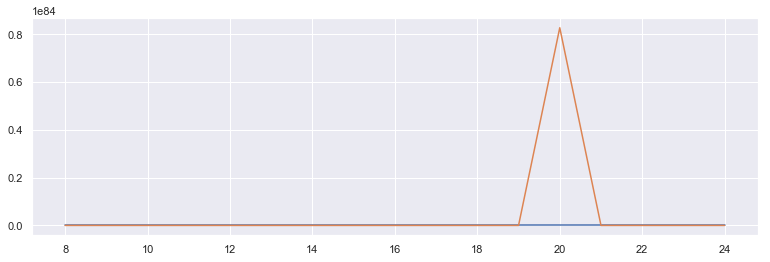

In [188]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 16].sort_values("mesIndex")
plt.plot(subdata.mesIndex, subdata.hivc)

plt.plot(subdata.mesIndex, subdata.pred_hivc)

In [118]:
data[data.deptocode == 1][["hivc", "pred_hivc", "mesIndex"]].sort_values("mesIndex")

,hivc,pred_hivc,mesIndex
5,2,6.315088,8
16,3,12.480054,9
20,7,8.233606,10
29,5,5.230798,11
34,4,8.081265,12
44,4,9.718626,13
48,2,6.886042,14
56,2,8.311459,15
63,2,9.808063,16
71,37,6.694645,17


In [165]:
glmmod = stapi.MixedLM.from_formula(
    "np.log1p(hivc) ~ 1 " + 
    #" + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) " + 
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag1") + 
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + 
    #" + (fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4)*(fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4) "
    " + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag3") + \
    " + np.log(hivc_lag1)  + np.log(hivc_lag2) + np.log(hivc_lag3)", 
    sigsagt[sigsagt.mesIndex < 18], 
    "1", groups = "deptocode2")
#glmmod = stapi.GLM.from_formula("np.log(hivc) ~ sida_lag1 + vih_lag1 + sida_lag2 + vih_lag2 + deptocode2 ", sigsagt)

In [166]:
glmfit = glmmod.fit()

In [167]:
glmfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:            MixedLM Dependent Variable: np.log1p(hivc)
No. Observations: 74      Method:             REML          
No. Groups:       9       Scale:              0.2440        
Min. group size:  1       Likelihood:         -81.1880      
Max. group size:  10      Converged:          Yes           
Mean group size:  8.2                                       
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          1.975    0.500  3.954 0.000  0.996  2.955
gonorrea_lag3     -0.020    0.014 -1.448 0.148 -0.047  0.007
sifilis_lag3      -0.007    0.022 -0.298 0.766 -0.050  0.037
infiel_lag3        0.007    0.006  1.045 0.296 -0.006  0.019
herpes_lag3       -0.005    0.003 -1.744 0.081 -0.012  0.001
infdld_lag3        0.008    0.012  0.620 0.536 -0.016  0.031
np.log(hivc_lag1) -0.036    0.121 -0.299 0.765 -0.273  0.201
np.log(hivc_lag2)  0.069    0.131  0.525 0.600 -0.188  0.325
np.log(hivc_lag3)  0.036    0.129  0.277 0.782 -0.216  0.288
deptocode2 Var     0.212    0.471                           
============================================================

"""

In [168]:
pred_hivc = np.exp(glmfit.predict(data))-1

In [169]:
data["pred_hivc"] = pred_hivc

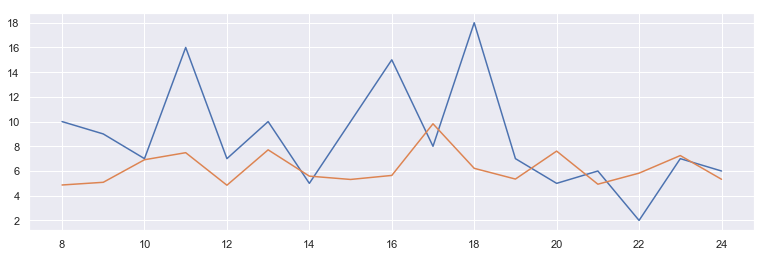

In [177]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 12].sort_values("mesIndex")
plt.plot(subdata.mesIndex, subdata.hivc)

plt.plot(subdata.mesIndex, subdata.pred_hivc)

In [570]:
data[data.deptocode == 16][["hivc", "pred_hivc"]]

,hivc,pred_hivc
5,3,2.822092e+04
10,3,3.510492e+09
18,1,8.989537e+01
37,1,2.212700e+01
42,2,2.347529e+00
60,3,1.062034e+08
83,7,4.089456e+02
96,6,6.036014e+00
107,80,-9.668691e-01
132,7,7.519798e+00


In [120]:
import sklearn.linear_model as sklm
import patsy

In [140]:
elnmod = sklm.Ridge(2.5)

In [153]:
    #" + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) " + 
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") + \
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + \
    #" + (fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4)*(fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4) "    
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") + \
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + \


formula = "np.log1p(hivc) ~ 1 " + \
    " + fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1 ".replace("lag1", "lag3") + \
    " + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag3") + \
    " + np.log(hivc_lag1)  + np.log(hivc_lag2) + np.log(hivc_lag3)"
train_datap = patsy.dmatrices(formula, data[data.mesIndex<20])
test_datap = patsy.dmatrices(formula, data[data.mesIndex>=20])

In [154]:
elnmod.fit(train_datap[1], train_datap[0]) 

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
pred_target =  np.exp(elnmod.predict(test_datap[1]))-1

In [156]:
data.loc[data.mesIndex < 20 , "pred_hivc"] = np.exp(elnmod.predict(train_datap[1]))-1
data.loc[data.mesIndex >= 20 , "pred_hivc"] = pred_target

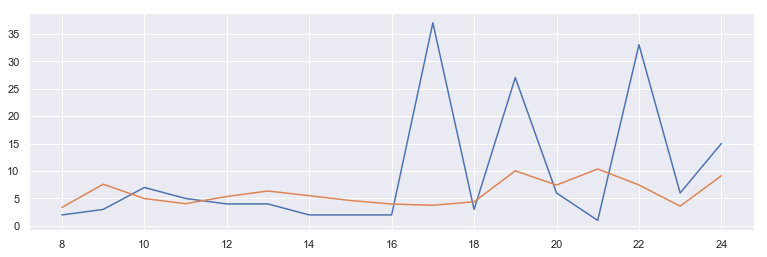

In [158]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 1].sort_values("mesIndex")
plt.plot(subdata.mesIndex, subdata.hivc)

plt.plot(subdata.mesIndex, subdata.pred_hivc)

In [ ]:
elnmod.

In [643]:
data[data.deptocode == 5].sort_values("mesIndex")[["hivc", "pred_hivc"]]

,hivc,pred_hivc
99,11,12.666296
45,13,13.026735
51,16,10.878702
30,22,10.269062
118,20,11.417433
69,18,14.841871
89,24,13.344487
127,24,14.592264
74,23,14.542144
135,32,14.978494


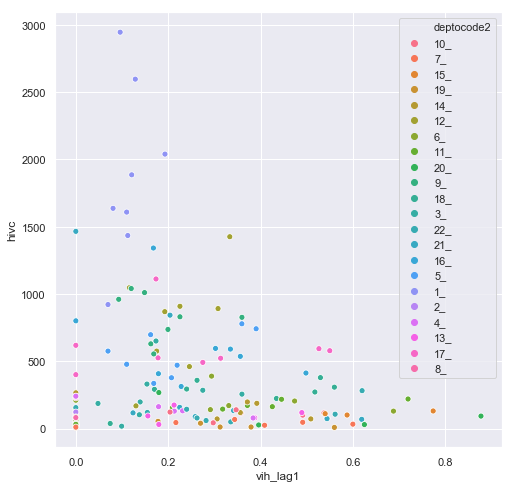

In [271]:
plt.rcParams["figure.figsize"] = (8,8)
sns.scatterplot("vih_lag1", "hivc", hue = "deptocode2", 
           data = sigsagt.assign(hivc=lambda x: (x.hivc)))

(0, 10)

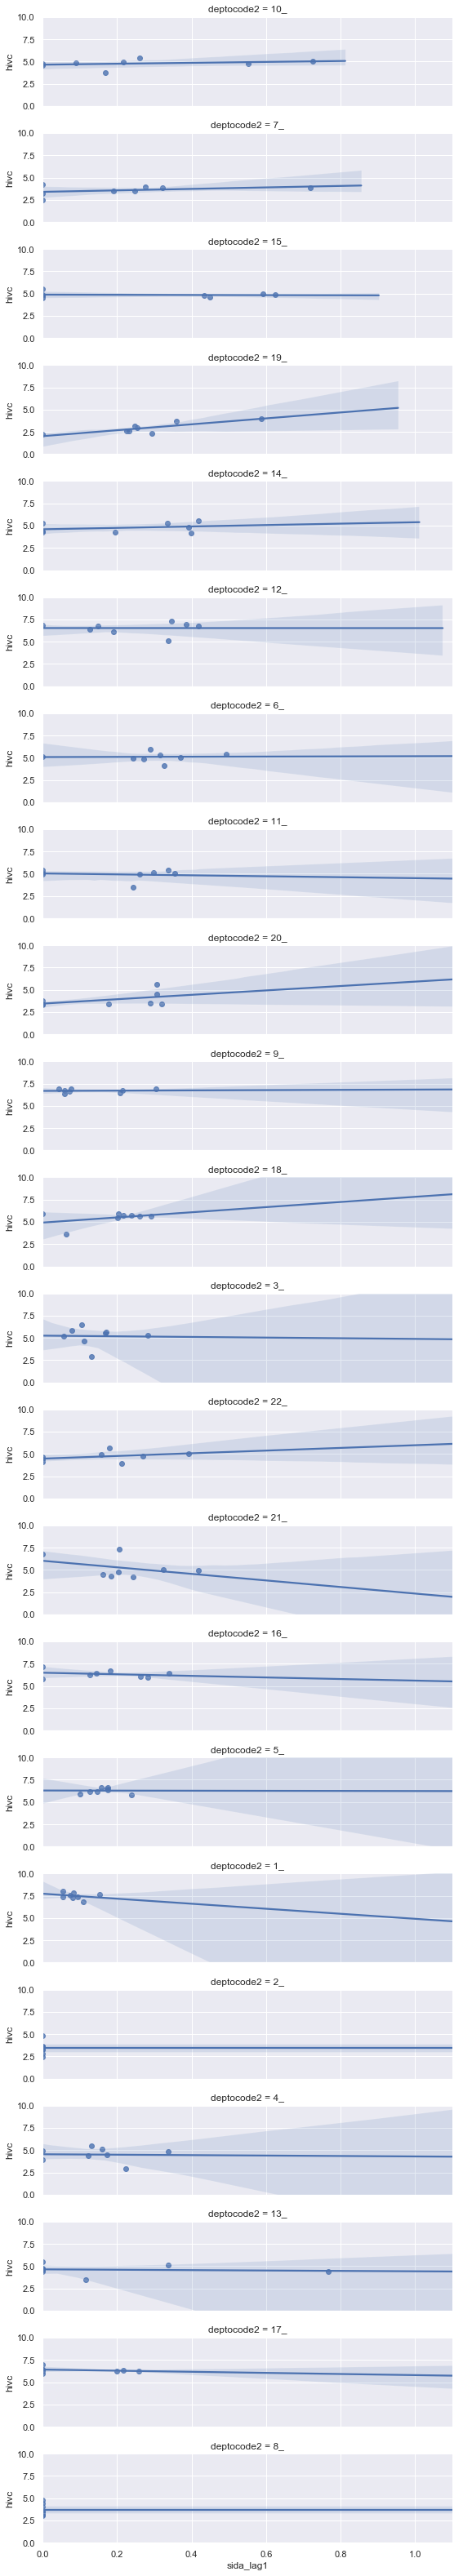

In [272]:
sns.lmplot("sida_lag1", "hivc", row = "deptocode2", fit_reg=True,
           data = sigsagt.assign(hivc=lambda x: np.log1p(x.hivc)),
           aspect=4, height=2)
plt.xlim(0,1.10)
plt.ylim(0,10)

In [217]:
sigsagt.head()

,Año,Mes,deptocode,sida_lag1,Residencia Actual-Depto,hivc,vih_lag1,hivc_lag1,deptocode2
0,2017,3,15,0.5600,BAJA VERAPAZ,198,0.0000,294,15_
1,2017,3,12,0.3248,SAN MARCOS,786,0.2496,785,12_
2,2017,3,6,0.3136,SANTA ROSA,88,0.6400,517,6_
3,2017,3,7,0.3136,SOLOLA,60,0.0000,49,7_
4,2017,3,17,0.2632,EL PETEN,331,0.5504,687,17_


In [219]:
sigsagt[(sigsagt.Año==2017) & (sigsagt.deptocode == 8)]

,Año,Mes,deptocode,sida_lag1,Residencia Actual-Depto,hivc,vih_lag1,hivc_lag1,deptocode2
21,2017,3,8,0.0,TOTONICAPAN,68,0.0,33,8_
43,2017,4,8,0.0,TOTONICAPAN,23,0.0,68,8_
65,2017,5,8,0.0,TOTONICAPAN,32,0.0,23,8_
86,2017,6,8,0.0,TOTONICAPAN,22,0.0,32,8_
104,2017,7,8,0.0,TOTONICAPAN,31,0.0,22,8_
131,2017,8,8,0.0,TOTONICAPAN,55,0.0,31,8_
153,2017,9,8,0.0,TOTONICAPAN,27,0.0,55,8_
175,2017,10,8,0.0,TOTONICAPAN,20,0.0,27,8_
197,2017,11,8,0.0,TOTONICAPAN,117,0.0,20,8_
219,2017,12,8,0.0,TOTONICAPAN,82,0.0,117,8_


In [220]:
gtrends[gtrends.deptocode == 8]

,depto,gtrend,filename,Año,Mes_orig,Term,deptocode
21,Totonicapán Department,NaN,GTrends-2017-01-SIDA.csv,2017,1,SIDA,8
21,Totonicapán Department,NaN,GTrends-2017-01-VIH.csv,2017,1,VIH,8
21,Totonicapán Department,NaN,GTrends-2017-02-SIDA.csv,2017,2,SIDA,8
20,Totonicapán Department,NaN,GTrends-2017-02-VIH.csv,2017,2,VIH,8
21,Totonicapán Department,NaN,GTrends-2017-03-SIDA.csv,2017,3,SIDA,8
21,Totonicapán Department,NaN,GTrends-2017-03-VIH.csv,2017,3,VIH,8
21,Totonicapán Department,NaN,GTrends-2017-04-SIDA.csv,2017,4,SIDA,8
21,Totonicapán Department,NaN,GTrends-2017-04-VIH.csv,2017,4,VIH,8
20,Totonicapán Department,NaN,GTrends-2017-05-SIDA.csv,2017,5,SIDA,8
20,Totonicapán Department,NaN,GTrends-2017-05-VIH.csv,2017,5,VIH,8
